In [2]:

import pandas as pd
import matplotlib as mpl             # http://www.matplotlib.org
import matplotlib.pyplot as plt      # http://plot.ly






# first let's draw a random walk
import numpy as np
np.random.seed(1000)
y = np.random.standard_normal(20)
y

# mean and stdev of y is supposed to be 0 and 1
# They are not because the sample size is small.
y.mean()
y.std()

# let's make horizontal axis: x
# x and y must be same length.
x = np.arange(len(y))
x

# simple plot
plt.plot(x, y)
plt.plot(y)  # it is the same because it uses the index of y as horizontal axis.

# can use a method inside the plot
plt.plot(y.cumsum())


# Let's plot S&P500 index
df_sp500 = pd.read_csv("S&P500 index.csv", index_col = 0)

df_sp500.columns    # check data
df_sp500.head()

x = df_sp500.index
y = df_sp500['spindx']

plt.plot(x, y)  # graph seems weird because of the horizontal axis.
plt.plot(y)     # same result. PLT uses index as horizonta axis if not specified.
print(x)
x.to_series().diff().plot() # intervals are not equal -> strange graph

# let's convert horizontal axis to date
df_sp500.index = pd.to_datetime(df_sp500.index, format='%Y%m%d')
y = df_sp500['spindx']
plt.plot(y)

# let's add grid to the graph, run the following three lines at the same time.
plt.plot(y)
plt.grid(True)


# plot of daily index difference
plt.plot(y.diff())
plt.grid(True)
plt.axis('equal')   # equal scaling of x and y axis

# setting the limits on axis
margin = 100
plt.plot(y.diff())
plt.ylim(y.diff().min() - margin, y.diff().max() + margin)

# Other options - need to run the following lines allrogether.
plt.figure(figsize = (10, 6))       # figure size
plt.plot(y.diff(), 'b', lw = 2, label='x-date')     # line, blue, width = 2
plt.plot(y.diff(), 'ro')            # market red O
plt.xlabel('date')                  # x-axis label
plt.ylabel('SP500 index')           # y-axis label
plt.title('Plot of S&P500 index')   # title
plt.legend()
'''
color options
b   blue
g   green
r   red
c   cyan
m   magenta
y   yellow
k   black
w   white


a few line style options
-   solid line
--  dashed line
-.  dash-dot line
:   dotted line
.   point marker
,   pixel marker
'''

# just for fun
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()


# Let's plot two values; # of companies and index value
y = df_sp500[['usdcnt', 'spindx']]
plt.figure(figsize = (15, 10))
plt.plot(y, 'r', lw = 1.5)
plt.plot(y, 'go')
plt.xlabel('date')
plt.ylabel('index')
plt.title('S&P 500 index value & count')


# separate cnt and index
plt.figure(figsize = (15, 10))
plt.plot(y['usdcnt'], 'r', lw = 1.5)
plt.plot(y['spindx'], 'g', lw = 1.5)
plt.xlabel('date')
plt.ylabel('index & cnt')
plt.title('S&P 500 index value & count')


# using legend
plt.figure(figsize = (15, 10))
plt.plot(y['usdcnt'], 'r', lw = 1.5, label = 'cnt')
plt.plot(y['spindx'], 'g', lw = 1.5, label = 'index')
plt.legend(loc =0)
plt.xlabel('date')
plt.ylabel('value')
plt.title('S&P 500 index value & count')
plt.show()


# two y-axis
fix, ax1 = plt.subplots()   # creating the first y axis
plt.plot(y['usdcnt'], 'r', lw = 1.5, label = 'cnt')
plt.plot(y['usdcnt'], 'ro')
plt.legend(loc =0)
plt.xlabel('date')
plt.ylabel('cnt')
plt.title('S&P 500 index value & count')
ax2 = ax1.twinx()           # creating the second y axis
plt.plot(y['spindx'], 'g', lw = 1.5, label = 'index')
plt.plot(y['spindx'], 'bo')
plt.legend(loc = 4)
plt.ylabel('index')
plt.show()


# two subplots
plt.figure(figsize = (10, 6))
plt.subplot(211)    # 2 by 1 subplots, 1 st one
plt.plot(y['usdcnt'], 'r', lw = 1.5, label = 'cnt')
plt.plot(y['usdcnt'], 'ro')
plt.legend(loc =0)
plt.xlabel('date')
plt.ylabel('cnt')
plt.title('S&P 500 index index and cnt')
plt.subplot(212)    # 2 by 1 subplots, 2nd one
plt.plot(y['spindx'], 'g', lw = 1.5, label = 'index')
plt.plot(y['spindx'], 'bo')
plt.legend(loc = 4)
plt.xlabel('date')
plt.ylabel('index')
plt.show()


# line/point chart + bar chart?
y = df_sp500[['spindx', 'totval']]
plt.figure(figsize = (10, 6))
plt.subplot(121)    # 1 by 2 subplots, 1 st one
plt.plot(y['spindx'], 'r', lw = 1.5, label = 'index')
plt.plot(y['spindx'], 'ro')
plt.legend(loc =0)
plt.xlabel('date')
plt.ylabel('index')
plt.title('S&P 500 index index and cnt')
plt.subplot(122)    # 1 by 2 subplots, 2nd one
plt.bar(y.index.year, y['totval'], width = 0.5, label = 'cnt')
plt.legend(loc = 4)
plt.xlabel('date')
plt.ylabel('cnt')
plt.title('S&P500 index constituents')
plt.show()


# scatter plot
y = df_sp500[['vwretd', 'totval']]
plt.figure(figsize = (10, 6))
plt.scatter(y.iloc[:, 0], y.iloc[:, 1], marker = 'o')
plt.xlabel(y.columns[0])
plt.ylabel(y.columns[1])
plt.title(y.columns[0] + ' vs. ' + y.columns[1])
plt.show()

# scatter plot with heat map
c = np.random.randint(0, 10, y.shape[0])    # random numbers btw 0 and 10, same length of data
y = df_sp500[['vwretd', 'totval']]
plt.figure(figsize = (10, 6))
plt.scatter(y.iloc[:, 0], y.iloc[:, 1], 
            c = c,                          # marker color
            cmap = 'coolwarm',              # color option
            marker = 'o')
plt.colorbar()
plt.xlabel(y.columns[0])
plt.ylabel(y.columns[1])
plt.title(y.columns[0] + ' vs. ' + y.columns[1])
plt.show()


# Histogram
y = df_sp500['vwretd']
plt.figure(figsize = (10, 6))
plt.hist(y, label = y.name, bins = 10)
plt.legend(loc = 0)
plt.xlabel(y.name)
plt.ylabel('frequency')
plt.title('Histogram')
plt.show()


''' 
Parameters for plt.hist()
bins        # of bins
range       Lower and upper range of x -> bins are determined based on this range.
rwidth      Relative width of the bars
stacked     to make bars to stack    
'''

# range example
y = df_sp500['vwretd']
plt.figure(figsize = (10, 6))
plt.hist(y, label = y.name, bins = 10, range = (-0.1, 0.1))
plt.legend(loc = 0)
plt.xlabel(y.name)
plt.ylabel('frequency')
plt.title('Histogram')
plt.show()


# stack example
y = df_sp500[['vwretd', 'sprtrn']]
plt.figure(figsize = (10, 6))
plt.hist(y, label = [y.columns[0], y.columns[1]], 
         color = ['r', 'b'],
         stacked = True,
         bins = 10,
         alpha = 0.8)
plt.legend(loc = 0)
plt.xlabel('return')
plt.ylabel('frequency')
plt.title('Histogram')
plt.show()


# 3d plot; call option: S, K & Call value
'''
Black-Scholes formula
C = N(d1)S - N(d2)PV(K)
S is the stock price
K strike price
s is standard deviation of annual return
T maturity in years
r risk free rate

d1 = 1/[s * T^0.5] * [log(S/K) + (r + s^2 / 2)*T]
d2 = d1 - s * T^0.5
PV(K) = K * exp(-rT)
'''
from scipy.stats import norm

s = 0.1
T = 3
r = 0.04
S = np.arange(1, 100, 5)
K = S.copy()

S, K = np.meshgrid(S, K)    # makes mesh grid of NxN matrix
d1 = 1/(s * T**0.5) * (np.log(S/K) + (r + s**2 / 2) * T)
d2 = d1 - s* T**0.5
PV = K * np.exp(-r * T)
C = norm.cdf(d1) * S - norm.cdf(d2) * PV

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10, 6))
ax = fig.gca(projection = '3d')
surf = ax.plot_surface(K, S, C, rstride = 2, cstride = 2,
                       cmap = plt.cm.coolwarm,
                       linewidth = 0.5,
                       antialiased = True)
ax.set_xlabel('strike')
ax.set_ylabel('stock price')
ax.set_zlabel('call option price')
fig.colorbar(surf, shrink = 0.5, aspect = 5)
plt.show()


# homework : make 3d graph of put option 
# x-axis : stock price
# y-axis : volatility
# z-axis : put option price.
# assume strike price a median point of x-axis.

Int64Index([20100129, 20100226, 20100331, 20100430, 20100528, 20100630,
            20100730, 20100831, 20100930, 20101029,
            ...
            20200331, 20200430, 20200529, 20200630, 20200731, 20200831,
            20200930, 20201030, 20201130, 20201231],
           dtype='int64', name='caldt', length=132)


ValueError: Date ordinal -1010061.55 converts to -796-07-18T10:48:00.000000 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

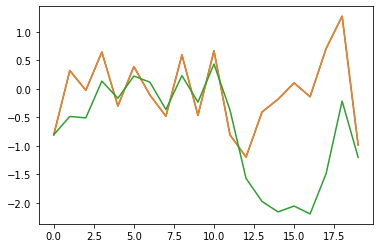

In [3]:

import pandas as pd
import matplotlib as mpl             # http://www.matplotlib.org
import matplotlib.pyplot as plt      # http://plot.ly

# first let's draw a random walk
import numpy as np
np.random.seed(1000)
y = np.random.standard_normal(20)
y

# mean and stdev of y is supposed to be 0 and 1
# They are not because the sample size is small.
y.mean()
y.std()

# let's make horizontal axis: x
# x and y must be same length.
x = np.arange(len(y))
x

# simple plot
plt.plot(x, y)
plt.plot(y)  # it is the same because it uses the index of y as horizontal axis.

# can use a method inside the plot
plt.plot(y.cumsum())

# Read the data

In [5]:
df_sp500 = pd.read_csv("S&P500 index.csv", index_col = 0)

df_sp500.columns    # check data
df_sp500.head()



,vwretd,totval,usdcnt,spindx,sprtrn
caldt,,,,,
20100129,-0.035751,9.867601e+09,500,1073.87,-0.036974
20100226,0.030424,1.018993e+10,499,1104.49,0.028514
20100331,0.061014,1.084282e+10,500,1169.43,0.058796
20100430,0.015977,1.100760e+10,500,1186.69,0.014759
20100528,-0.080111,1.010437e+10,500,1089.41,-0.081976


# Plot the S&P500 index

Int64Index([20100129, 20100226, 20100331, 20100430, 20100528, 20100630,
            20100730, 20100831, 20100930, 20101029,
            ...
            20200331, 20200430, 20200529, 20200630, 20200731, 20200831,
            20200930, 20201030, 20201130, 20201231],
           dtype='int64', name='caldt', length=132)


<AxesSubplot:xlabel='caldt'>

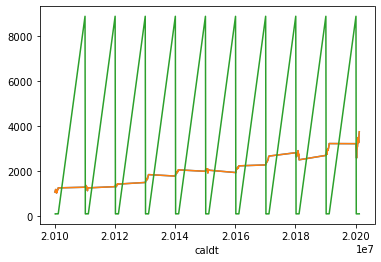

In [6]:
x = df_sp500.index
y = df_sp500['spindx']

plt.plot(x, y)  # graph seems weird because of the horizontal axis.
plt.plot(y)     # same result. PLT uses index as horizonta axis if not specified.
print(x)
x.to_series().diff().plot() # intervals are not equal -> strange graph




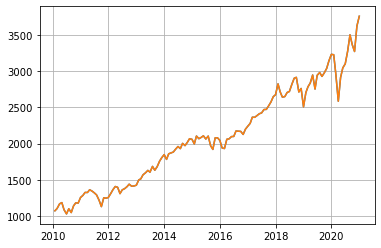

In [7]:
# let's convert horizontal axis to date
df_sp500.index = pd.to_datetime(df_sp500.index, format='%Y%m%d')
y = df_sp500['spindx']
plt.plot(y)

# let's add grid to the graph, run the following three lines at the same time.
plt.plot(y)
plt.grid(True)

# Plot of daily index difference

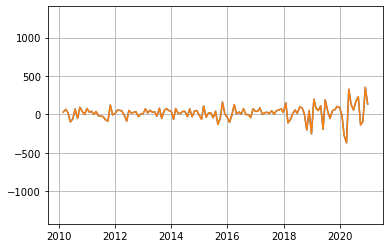

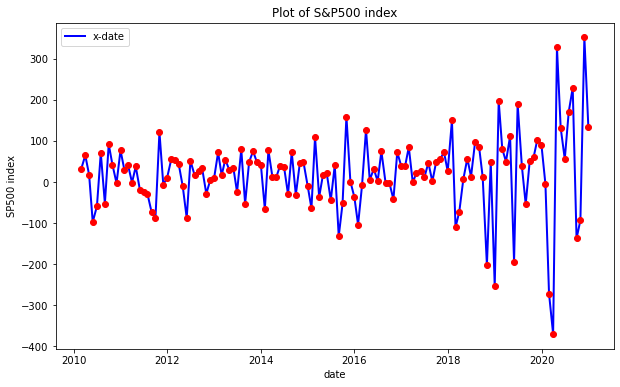

In [8]:
plt.plot(y.diff())
plt.grid(True)
plt.axis('equal')   # equal scaling of x and y axis

# setting the limits on axis
margin = 100
plt.plot(y.diff())
plt.ylim(y.diff().min() - margin, y.diff().max() + margin)

# Other options - need to run the following lines allrogether.
plt.figure(figsize = (10, 6))       # figure size
plt.plot(y.diff(), 'b', lw = 2, label='x-date')     # line, blue, width = 2
plt.plot(y.diff(), 'ro')            # market red O
plt.xlabel('date')                  # x-axis label
plt.ylabel('SP500 index')           # y-axis label
plt.title('Plot of S&P500 index')   # title
plt.legend()

# Companies and index value plot

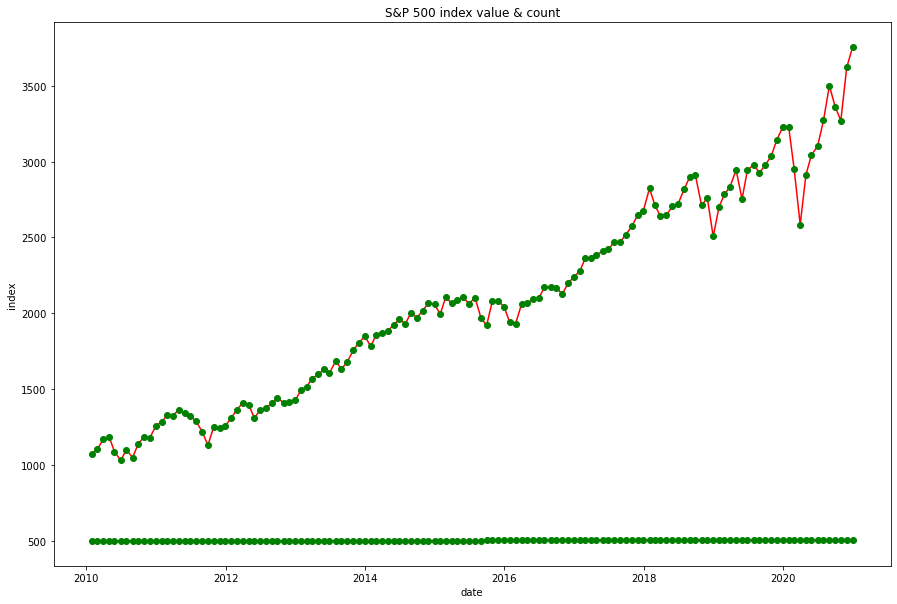

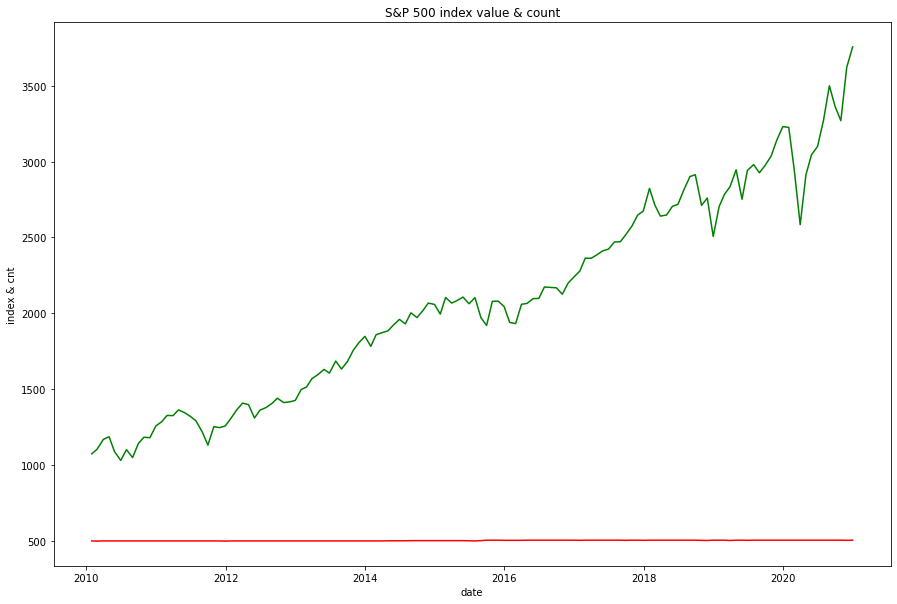

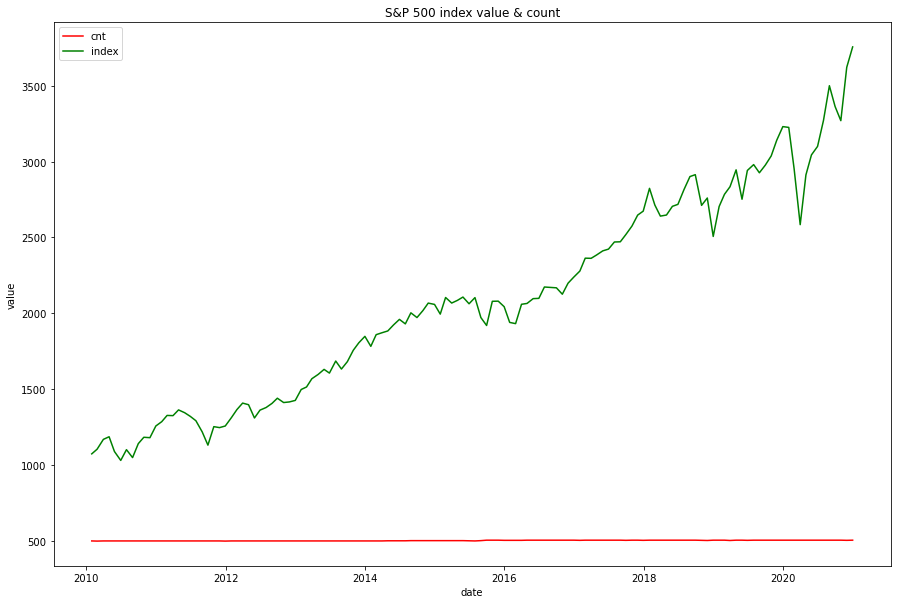

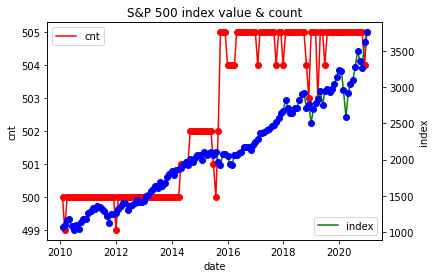

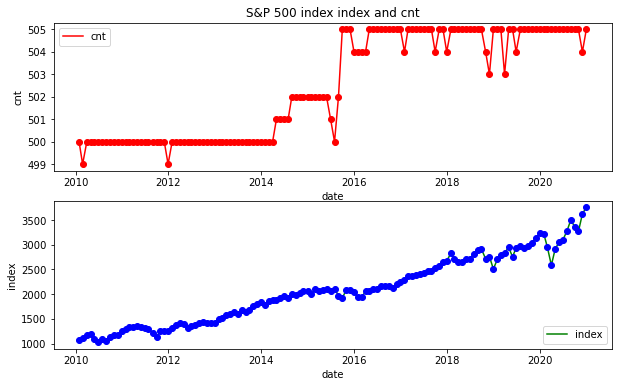

In [9]:
y = df_sp500[['usdcnt', 'spindx']]
plt.figure(figsize = (15, 10))
plt.plot(y, 'r', lw = 1.5)
plt.plot(y, 'go')
plt.xlabel('date')
plt.ylabel('index')
plt.title('S&P 500 index value & count')


# separate cnt and index
plt.figure(figsize = (15, 10))
plt.plot(y['usdcnt'], 'r', lw = 1.5)
plt.plot(y['spindx'], 'g', lw = 1.5)
plt.xlabel('date')
plt.ylabel('index & cnt')
plt.title('S&P 500 index value & count')


# using legend
plt.figure(figsize = (15, 10))
plt.plot(y['usdcnt'], 'r', lw = 1.5, label = 'cnt')
plt.plot(y['spindx'], 'g', lw = 1.5, label = 'index')
plt.legend(loc =0)
plt.xlabel('date')
plt.ylabel('value')
plt.title('S&P 500 index value & count')
plt.show()


# two y-axis
fix, ax1 = plt.subplots()   # creating the first y axis
plt.plot(y['usdcnt'], 'r', lw = 1.5, label = 'cnt')
plt.plot(y['usdcnt'], 'ro')
plt.legend(loc =0)
plt.xlabel('date')
plt.ylabel('cnt')
plt.title('S&P 500 index value & count')
ax2 = ax1.twinx()           # creating the second y axis
plt.plot(y['spindx'], 'g', lw = 1.5, label = 'index')
plt.plot(y['spindx'], 'bo')
plt.legend(loc = 4)
plt.ylabel('index')
plt.show()


# two subplots
plt.figure(figsize = (10, 6))
plt.subplot(211)    # 2 by 1 subplots, 1 st one
plt.plot(y['usdcnt'], 'r', lw = 1.5, label = 'cnt')
plt.plot(y['usdcnt'], 'ro')
plt.legend(loc =0)
plt.xlabel('date')
plt.ylabel('cnt')
plt.title('S&P 500 index index and cnt')
plt.subplot(212)    # 2 by 1 subplots, 2nd one
plt.plot(y['spindx'], 'g', lw = 1.5, label = 'index')
plt.plot(y['spindx'], 'bo')
plt.legend(loc = 4)
plt.xlabel('date')
plt.ylabel('index')
plt.show()

# Advanced visualizations to analyse the data

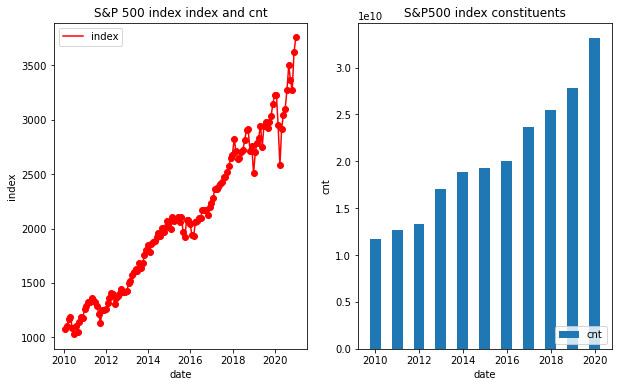

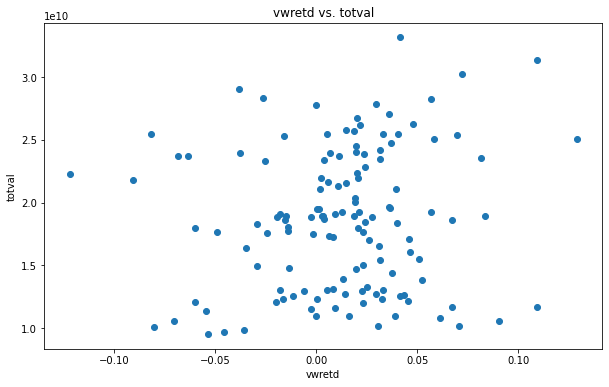

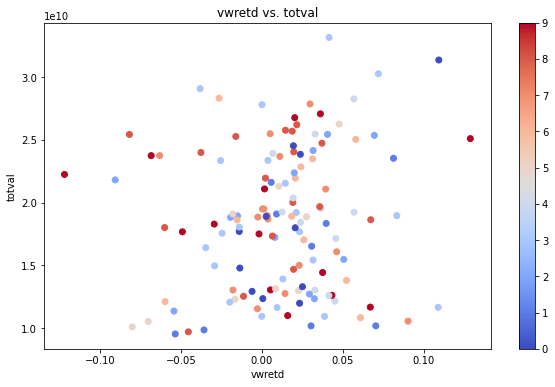

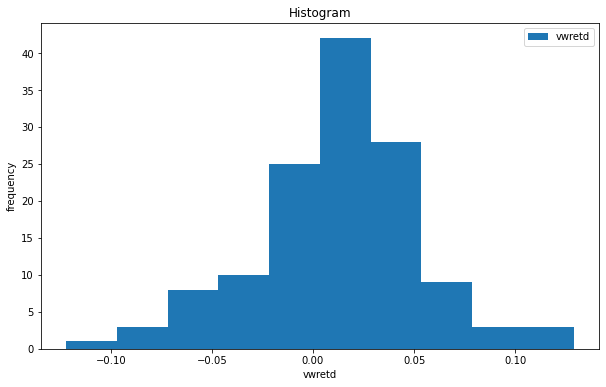

In [11]:
y = df_sp500[['spindx', 'totval']]
plt.figure(figsize = (10, 6))
plt.subplot(121)    # 1 by 2 subplots, 1 st one
plt.plot(y['spindx'], 'r', lw = 1.5, label = 'index')
plt.plot(y['spindx'], 'ro')
plt.legend(loc =0)
plt.xlabel('date')
plt.ylabel('index')
plt.title('S&P 500 index index and cnt')
plt.subplot(122)    # 1 by 2 subplots, 2nd one
plt.bar(y.index.year, y['totval'], width = 0.5, label = 'cnt')
plt.legend(loc = 4)
plt.xlabel('date')
plt.ylabel('cnt')
plt.title('S&P500 index constituents')
plt.show()


# scatter plot
y = df_sp500[['vwretd', 'totval']]
plt.figure(figsize = (10, 6))
plt.scatter(y.iloc[:, 0], y.iloc[:, 1], marker = 'o')
plt.xlabel(y.columns[0])
plt.ylabel(y.columns[1])
plt.title(y.columns[0] + ' vs. ' + y.columns[1])
plt.show()

# scatter plot with heat map
c = np.random.randint(0, 10, y.shape[0])    # random numbers btw 0 and 10, same length of data
y = df_sp500[['vwretd', 'totval']]
plt.figure(figsize = (10, 6))
plt.scatter(y.iloc[:, 0], y.iloc[:, 1], 
            c = c,                          # marker color
            cmap = 'coolwarm',              # color option
            marker = 'o')
plt.colorbar()
plt.xlabel(y.columns[0])
plt.ylabel(y.columns[1])
plt.title(y.columns[0] + ' vs. ' + y.columns[1])
plt.show()


# Histogram
y = df_sp500['vwretd']
plt.figure(figsize = (10, 6))
plt.hist(y, label = y.name, bins = 10)
plt.legend(loc = 0)
plt.xlabel(y.name)
plt.ylabel('frequency')
plt.title('Histogram')
plt.show()


# S, K & Call value
'''
Black-Scholes formula

C = N(d1)S - N(d2)PV(K)

S is the stock price
K strike price
s is standard deviation of annual return
T maturity in years
r risk free rate

d1 = 1/[s * T^0.5] * [log(S/K) + (r + s^2 / 2)*T]
d2 = d1 - s * T^0.5
PV(K) = K * exp(-rT)

/var/folders/cv/hfglbglj3rd5vvgj2_27g0p80000gn/T/ipykernel_76018/3422966155.py:17: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection = '3d')


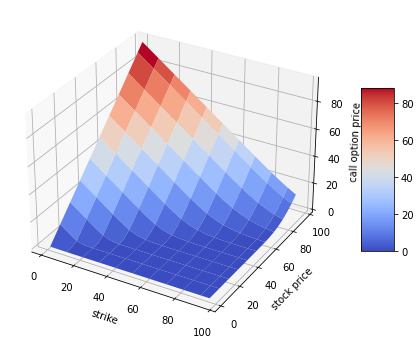

In [13]:
from scipy.stats import norm

s = 0.1
T = 3
r = 0.04
S = np.arange(1, 100, 5)
K = S.copy()

S, K = np.meshgrid(S, K)    # makes mesh grid of NxN matrix
d1 = 1/(s * T**0.5) * (np.log(S/K) + (r + s**2 / 2) * T)
d2 = d1 - s* T**0.5
PV = K * np.exp(-r * T)
C = norm.cdf(d1) * S - norm.cdf(d2) * PV

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10, 6))
ax = fig.gca(projection = '3d')
surf = ax.plot_surface(K, S, C, rstride = 2, cstride = 2,
                       cmap = plt.cm.coolwarm,
                       linewidth = 0.5,
                       antialiased = True)
ax.set_xlabel('strike')
ax.set_ylabel('stock price')
ax.set_zlabel('call option price')
fig.colorbar(surf, shrink = 0.5, aspect = 5)
plt.show()